# **RNN**





In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
Df=pd.read_csv("/content/Education.csv")
Df

,Text,Label
0,The impact of educational reforms remains unce...,positive
1,Critics argue that recent improvements in the ...,negative
2,Innovative teaching methods have led to unexpe...,positive
3,"Despite budget constraints, the school has man...",positive
4,The true effectiveness of online learning plat...,negative
5,The role of standardized testing in education ...,positive
6,School curricula should focus more on practica...,positive
7,Educational technology has the potential to re...,positive
8,Charter schools offer alternatives to traditio...,positive
9,Teacher tenure policies aim to protect educato...,positive


In [ ]:
#encoding the labels
label_encoder = LabelEncoder()
Df['Label'] = label_encoder.fit_transform(Df['Label'])

In [ ]:
# Tokenize and pad the text data and pad
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(Df['Text'])
X = tokenizer.texts_to_sequences(Df['Text'])
X = pad_sequences(X, maxlen=150,padding='post')
X

array([[  2,  96,   5, ...,   0,   0,   0],
       [100, 101, 102, ...,   0,   0,   0],
       [108, 109, 110, ...,   0,   0,   0],
       ...,
       [ 10,  94, 279, ...,   0,   0,   0],
       [ 33,   3, 282, ...,   0,   0,   0],
       [ 19, 284, 285, ...,   0,   0,   0]], dtype=int32)

In [ ]:
y = Df['Label'].values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(36, 150)

In [ ]:
#Build the model
model = Sequential()

In [ ]:
# Embedding layer: Converts word indices to dense vectors
model.add(Embedding(input_dim=10000, output_dim=128))

In [ ]:
# First RNN layer
model.add(SimpleRNN(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(SimpleRNN(64, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 777ms/step - accuracy: 0.4132 - loss: 0.6937 - val_accuracy: 0.6250 - val_loss: 0.6862
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.4317 - loss: 0.7021 - val_accuracy: 0.6250 - val_loss: 0.6817
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.4317 - loss: 0.7043 - val_accuracy: 0.6250 - val_loss: 0.6775
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - accuracy: 0.4421 - loss: 0.7025 - val_accuracy: 0.6250 - val_loss: 0.6764
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.4525 - loss: 0.7042 - val_accuracy: 0.6250 - val_loss: 0.6808
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.4213 - loss: 0.7008 - val_accuracy: 0.6250 - val_loss: 0.6822
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.4236 - loss: 0.7060 - val_accuracy: 0.6250 - val_loss: 0.6822
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.4711 - loss: 0.6990 - val_accuracy: 0.6250 - val_loss

In [ ]:
#Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

1/1 - 0s - 47ms/step - accuracy: 0.6250 - loss: 0.6906
Test accuracy: 62.50%


In [ ]:
#  Predict sentiment for  text
def predict_sentiment(review_text):
    sequence = tokenizer.texts_to_sequences([review_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded_sequence)
    return "Positive" if prediction >= 0.5 else "Negative"
sample_review = "The role of standardized testing in education has been widely debated."
sentiment = predict_sentiment(sample_review)
print(f"Predicted sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
Predicted sentiment: Positive


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 150, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 150, 128)            │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 150, 128)            │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,082,309 (15.57 MB)

 Trainable params: 1,360,769 (5.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,721,540 (10.38 MB)

# **LSTM**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
data = pd.read_csv('/content/train.csv')
data

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808
...,...,...,...,...
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

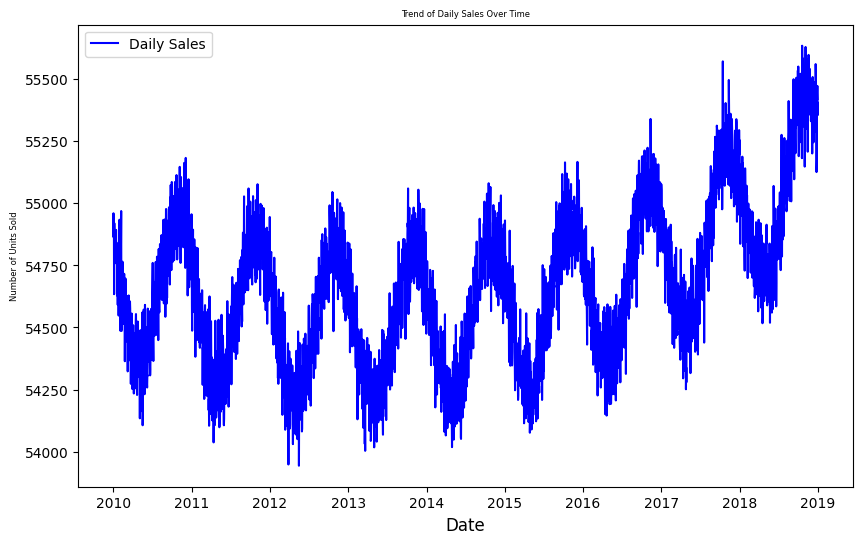

In [ ]:
# Aggregate number_sold by date to observe overall trends
daily_sales = data.groupby('Date')['number_sold'].sum()
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='blue')
plt.title('Trend of Daily Sales Over Time', fontsize=6)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Units Sold', fontsize=6)
plt.legend()
plt.show()


In [ ]:
# Normalize the sales data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(daily_sales.values.reshape(-1, 1))

In [ ]:

# Prepare sequences for supervised learning
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30  # Use the past 30 days for prediction
X, y = create_sequences(scaled_sales, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


In [ ]:
# Build  LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0531 - val_loss: 0.0058
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0051 - val_loss: 0.0089
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - val_loss: 0.0057
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - val_loss: 0.0060
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0051 - val_loss: 0.0061
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048
Test Loss (MSE): 0.004702412057667971


In [ ]:
predictions = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
# Reverse normalization for interpretation
y_test_actual = scaler.inverse_transform(y_test)
predictions_actual = scaler.inverse_transform(predictions)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test_actual, predictions_actual)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 13462.38
Root Mean Squared Error: 116.03
Mean Absolute Error: 93.09
R-squared: 0.86


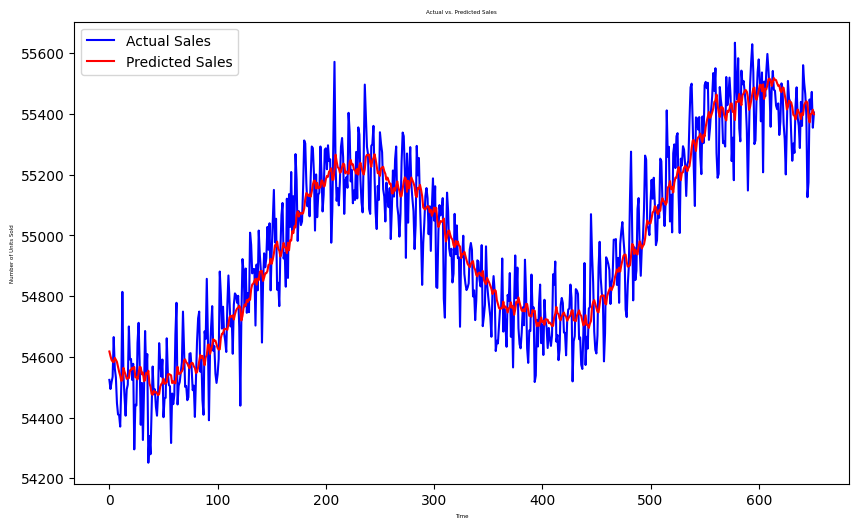

In [ ]:
# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Sales', color='blue')
plt.plot(predictions_actual, label='Predicted Sales', color='red')
plt.title('Actual vs. Predicted Sales', fontsize=4)
plt.xlabel('Time', fontsize=4)
plt.ylabel('Number of Units Sold', fontsize=4)
plt.legend()
plt.show()